In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df.shape

(30471, 292)

In [5]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

## Deal with Missing values

In [6]:
df.isnull().sum()

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

#### check how much data is missing in the form of percentage

In [7]:
null_value_per = df.isnull().sum()/df.shape[0]*100

In [8]:
null_value_per

id                                        0.000000
timestamp                                 0.000000
full_sq                                   0.000000
life_sq                                  20.947786
floor                                     0.548062
max_floor                                31.413475
material                                 31.413475
build_year                               44.649011
num_room                                 31.413475
kitch_sq                                 31.413475
state                                    44.498047
product_type                              0.000000
sub_area                                  0.000000
area_m                                    0.000000
raion_popul                               0.000000
green_zone_part                           0.000000
indust_part                               0.000000
children_preschool                        0.000000
preschool_quota                          21.948738
preschool_education_centers_rai

In [9]:
corri =  df.corr()['price_doc']

In [10]:
corri

id                                       0.121203
full_sq                                  0.341840
life_sq                                  0.165606
floor                                    0.117447
max_floor                                0.094386
material                                 0.064047
build_year                               0.002161
num_room                                 0.476337
kitch_sq                                 0.028718
state                                    0.121303
area_m                                  -0.166981
raion_popul                              0.151587
green_zone_part                         -0.094486
indust_part                             -0.082614
children_preschool                       0.133957
preschool_quota                         -0.075118
preschool_education_centers_raion        0.159418
children_school                          0.138860
school_quota                            -0.014012
school_education_centers_raion           0.193636


In [11]:
df3 =pd.DataFrame(data = corri)

In [12]:
df3

,price_doc
id,0.121203
full_sq,0.341840
life_sq,0.165606
floor,0.117447
max_floor,0.094386
material,0.064047
build_year,0.002161
num_room,0.476337
kitch_sq,0.028718
state,0.121303


In [13]:
df3['null_value'] =  null_value_per

In [14]:
df3

,price_doc,null_value
id,0.121203,0.000000
full_sq,0.341840,0.000000
life_sq,0.165606,20.947786
floor,0.117447,0.548062
max_floor,0.094386,31.413475
material,0.064047,31.413475
build_year,0.002161,44.649011
num_room,0.476337,31.413475
kitch_sq,0.028718,31.413475
state,0.121303,44.498047


In [15]:
drop_cul_per = null_value_per[null_value_per>16].keys()
drop_cul_per_set  = set(drop_cul_per)  
drop_cul_corr = corri[corri<0.2].keys()
drop_cul_corr_set = set(drop_cul_corr)

In [16]:
z = drop_cul_corr_set.intersection(drop_cul_per_set) 
z

{'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'build_count_before_1920',
 'build_count_block',
 'build_count_brick',
 'build_count_foam',
 'build_count_frame',
 'build_count_mix',
 'build_count_monolith',
 'build_count_panel',
 'build_count_slag',
 'build_count_wood',
 'build_year',
 'cafe_avg_price_1000',
 'cafe_avg_price_500',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_sum_500_min_price_avg',
 'hospital_beds_raion',
 'kitch_sq',
 'life_sq',
 'material',
 'max_floor',
 'preschool_quota',
 'raion_build_count_with_builddate_info',
 'raion_build_count_with_material_info',
 'school_quota',
 'state'}

In [17]:
df.drop(z,axis = 1,inplace =True)

In [18]:
df.isnull().sum()/df.shape[0]*100

id                                        0.000000
timestamp                                 0.000000
full_sq                                   0.000000
floor                                     0.548062
num_room                                 31.413475
product_type                              0.000000
sub_area                                  0.000000
area_m                                    0.000000
raion_popul                               0.000000
green_zone_part                           0.000000
indust_part                               0.000000
children_preschool                        0.000000
preschool_education_centers_raion         0.000000
children_school                           0.000000
school_education_centers_raion            0.000000
school_education_centers_top_20_raion     0.000000
healthcare_centers_raion                  0.000000
university_top_20_raion                   0.000000
sport_objects_raion                       0.000000
additional_education_raion     

In [19]:
df.describe()

,id,full_sq,floor,num_room,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_co

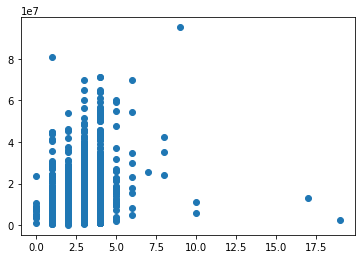

In [20]:
plt.scatter(x = 'num_room' ,y = 'price_doc',data = df )
plt.show()

In [21]:
from statistics import mode
mode(df['num_room'])

2.0

In [22]:
df['num_room'].fillna(2,inplace = True)

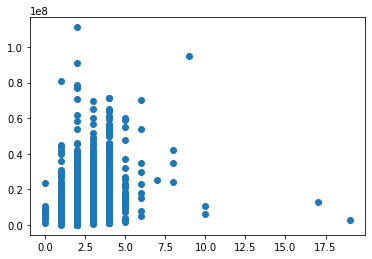

In [23]:
plt.scatter(x = 'num_room' ,y = 'price_doc',data = df )
plt.show()

In [24]:
df.isnull().sum()

id                                          0
timestamp                                   0
full_sq                                     0
floor                                     167
num_room                                    0
product_type                                0
sub_area                                    0
area_m                                      0
raion_popul                                 0
green_zone_part                             0
indust_part                                 0
children_preschool                          0
preschool_education_centers_raion           0
children_school                             0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
healthcare_centers_raion                    0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25                      0
culture_objects_top_25_raion      

In [25]:
df.head()

,id,timestamp,full_sq,floor,num_room,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_

In [26]:
fill_mean = {'metro_min_walk':df['metro_min_walk'].mean(),'metro_km_walk':df['metro_km_walk'].mean(),'railroad_station_walk_km':df['railroad_station_walk_km'].mean(),'railroad_station_walk_min':df['railroad_station_walk_min'].mean(),'cafe_sum_1500_min_price_avg':df['cafe_sum_1500_min_price_avg'].mean(),'cafe_sum_1500_max_price_avg':df['cafe_sum_1500_max_price_avg'].mean(),'cafe_avg_price_1500':df['cafe_avg_price_1500'].mean(),'cafe_sum_2000_min_price_avg':df['cafe_sum_2000_min_price_avg'].mean(),'cafe_sum_2000_max_price_avg':df['cafe_sum_2000_max_price_avg'].mean(),'cafe_avg_price_2000':df['cafe_avg_price_2000'].mean(),'cafe_sum_3000_min_price_avg':df['cafe_sum_3000_min_price_avg'].mean(),'cafe_sum_3000_max_price_avg':df['cafe_sum_3000_max_price_avg'].mean(),'cafe_avg_price_3000':df['cafe_avg_price_3000'].mean(),'prom_part_5000':df['prom_part_5000'].mean(),'cafe_sum_5000_min_price_avg':df['cafe_sum_5000_min_price_avg'].mean(),'cafe_sum_5000_max_price_avg':df['cafe_sum_5000_max_price_avg'].mean(),'cafe_avg_price_5000':df['cafe_avg_price_5000'].mean()}
fill_mode = {'floor':df['floor'].mode(),'ID_railroad_station_walk':df['ID_railroad_station_walk'].mode()}

In [27]:
df.fillna(value=fill_mean,inplace = True)

In [28]:
df.isnull().sum()

id                                         0
timestamp                                  0
full_sq                                    0
floor                                    167
num_room                                   0
product_type                               0
sub_area                                   0
area_m                                     0
raion_popul                                0
green_zone_part                            0
indust_part                                0
children_preschool                         0
preschool_education_centers_raion          0
children_school                            0
school_education_centers_raion             0
school_education_centers_top_20_raion      0
healthcare_centers_raion                   0
university_top_20_raion                    0
sport_objects_raion                        0
additional_education_raion                 0
culture_objects_top_25                     0
culture_objects_top_25_raion               0
shopping_c

In [29]:
df.fillna(method='ffill',inplace = True)